In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [15]:
data_train = fetch_20newsgroups(subset='train')
data_test = fetch_20newsgroups(subset='test')

In [16]:
train_vectorizer = TfidfVectorizer(stop_words='english')
test_vectorizer = TfidfVectorizer(stop_words='english')

In [17]:
X_train = train_vectorizer.fit_transform(data_train.data)
train_features = train_vectorizer.get_feature_names()
y_train = data_train.target
X_test = test_vectorizer.fit_transform(data_test.data)
test_features = test_vectorizer.get_feature_names()
y_test = data_test.target

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11314, 129796)
(11314,)
(7532, 93255)
(7532,)


In [18]:
intersect_features = np.intersect1d(train_features, test_features)
len(intersect_features)

49600

In [19]:
def get_indices(x, y):
    ''' returns an index of elements in y for all elements in x'''
    return list(set(np.searchsorted(y, x)))

In [20]:
train_cols = get_indices(intersect_features, train_features)

In [21]:
test_cols = get_indices(intersect_features, test_features)

In [41]:
new_X_train = X_train[:,train_cols]
new_X_train.shape

(11314, 49600)

In [42]:
new_X_test = X_test[:,test_cols]
new_X_test.shape

(7532, 49600)

In [43]:
cs_tt = cosine_similarity(new_X_train, new_X_test)
cs_tt.shape

(11314, 7532)

In [46]:
def knn(col, k, sim_mat):
    _vec = sim_mat[:,col].tolist()
    _vec = sorted(enumerate(_vec), key=lambda x: x[1], reverse=True)
    _vec_ind = [x[0] for x in _vec[:k]]
    return _vec_ind, [y_train[x] for x in _vec_ind], y_test[col]

In [62]:
from time import time

test4k = [[2,
  4,
  6,
  8,
  10,
  12,
  14,
  16,
  18,
  20,
  22,
  24,
  26,
  28,
  30,
  32,
  34,
  36,
  38,
  40,
  42,
  44,
  46,
  48,
  50,
  52,
  54,
  56,
  58,
  60,
  62,
  64,
  66,
  68],
 [0.6336962294211365,
  0.6617100371747212,
  0.671003717472119,
  0.6731279872543813,
  0.6769782262347318,
  0.6789697291556027,
  0.6830855018587361,
  0.6845459373340415,
  0.6853425385023898,
  0.6887944768985661,
  0.6898566117896973,
  0.6906532129580457,
  0.6915825809877855,
  0.694768985661179,
  0.6960966542750929,
  0.6963621879978757,
  0.6962294211364843,
  0.6968932554434413,
  0.6999468932554435,
  0.6991502920870951,
  0.7002124269782263,
  0.7006107275624004,
  0.699814126394052,
  0.6999468932554435,
  0.7002124269782263,
  0.701805629314923,
  0.7033988316516198,
  0.7048592671269251,
  0.7057886351566649,
  0.70817843866171,
  0.7087095061072757,
  0.7117631439192778,
  0.7093733404142326,
  0.7105682421667552]]

# for k in range(50, 70, 2):
#     scount = 0
#     tcount = 0
#     t0 = time()
#     for c in range(cs_tt.shape[1]):
#         ind, pvals, y = knn(c, k, cs_tt)
#         pval = max(set(pvals), key=pvals.count)
#         tcount += 1
#         if pval == y:
#             scount += 1
#     test4k[0].append(k)
#     test4k[1].append(scount/tcount)
#     print('k: {}'.format(k))
#     print('Match count: {}'.format(scount))
#     print('Total count: {}'.format(tcount))
#     print('Accuracy: {}'.format(scount/tcount))
#     print('Time taken for this run: {}s'.format(time()-t0))
#     print('-'*10)

In [59]:
test4k

[[2,
  4,
  6,
  8,
  10,
  12,
  14,
  16,
  18,
  20,
  22,
  24,
  26,
  28,
  30,
  32,
  34,
  36,
  38,
  40,
  42,
  44,
  46,
  48,
  50,
  52,
  54,
  56,
  58,
  60,
  62,
  64,
  66,
  68],
 [0.6336962294211365,
  0.6617100371747212,
  0.671003717472119,
  0.6731279872543813,
  0.6769782262347318,
  0.6789697291556027,
  0.6830855018587361,
  0.6845459373340415,
  0.6853425385023898,
  0.6887944768985661,
  0.6898566117896973,
  0.6906532129580457,
  0.6915825809877855,
  0.694768985661179,
  0.6960966542750929,
  0.6963621879978757,
  0.6962294211364843,
  0.6968932554434413,
  0.6999468932554435,
  0.6991502920870951,
  0.7002124269782263,
  0.7006107275624004,
  0.699814126394052,
  0.6999468932554435,
  0.7002124269782263,
  0.701805629314923,
  0.7033988316516198,
  0.7048592671269251,
  0.7057886351566649,
  0.70817843866171,
  0.7087095061072757,
  0.7117631439192778,
  0.7093733404142326,
  0.7105682421667552]]

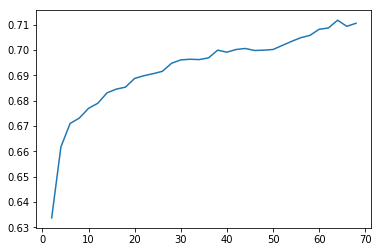

In [63]:
import matplotlib.pyplot as plt

plt.plot(test4k[0], test4k[1])
plt.show()

In [296]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(new_X_train, y_train)

_vec = new_X_test[0]
print(neigh.predict(_vec))
print(neigh.predict_proba(_vec))

[10]
[[ 0.   0.   0.   0.   0.   0.2  0.   0.   0.   0.   0.4  0.   0.   0.   0.
   0.   0.   0.2  0.2  0. ]]
